In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1-49YOh4IvvPNETWd91SNQQScjIdkvEb6

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1-49YOh4IvvPNETWd91SNQQScjIdkvEb6
To: /content/weatherHistory.csv
100% 16.3M/16.3M [00:00<00:00, 43.6MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [ ]:
df = pd.read_csv("/content/weatherHistory.csv")

In [ ]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


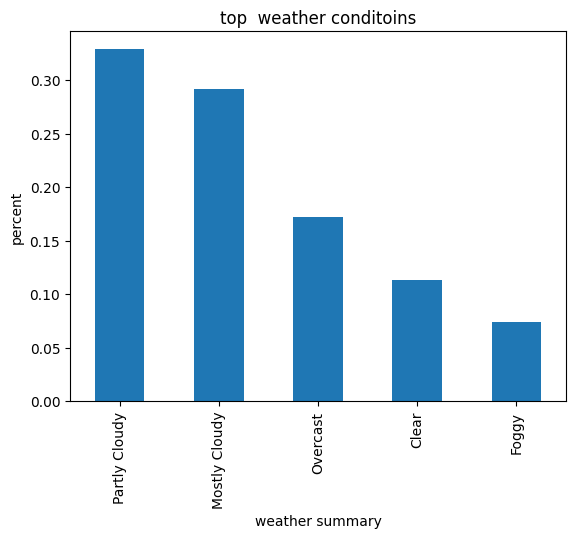

In [ ]:
plt1 = df["Summary"].value_counts(normalize = True).head(5).plot(kind = 'bar', title = 'top  weather conditoins')
plt1.set_xlabel('weather summary')
plt1.set_ylabel('percent')
plt.show()

In [ ]:
columns = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
           'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
           'Pressure (millibars)']

sns.set(style="whitegrid")

n_plots = len(columns) * 2


plt.figure(figsize=(15, 20))

for i, column in enumerate(columns):

    plt.subplot(len(columns), 2, 2*i+1)
    sns.histplot(data=df, x=column, stat='density', bins=30, label=f'histogram of {column}')
    plt.title(f'Distribution of {column}')
    plt.ylabel('Density')
    plt.legend()

    plt.subplot(len(columns), 2, 2*i+2)
    plt.boxplot(df[column].dropna())
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

for column in columns:
    print(f"--- {column} ---")
    print(f"Mean: {df[column].mean()}")
    print(f"Median: {df[column].median()}")
    print(f"Variance: {df[column].var()}")
    print(f"Standard Deviation: {df[column].std()}")
    print(f"Range: {df[column].max() - df[column].min()}")
    print()

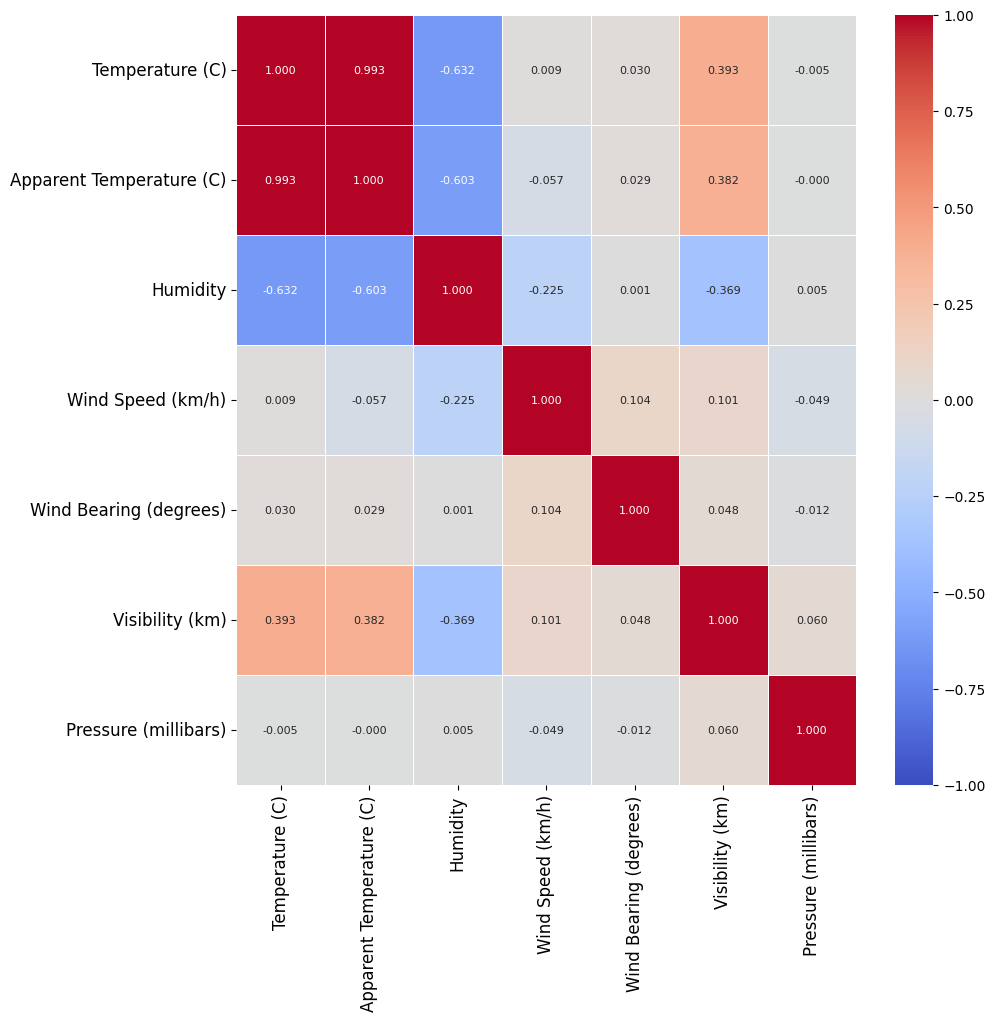

In [ ]:
df1 = df.iloc[:, 3:-1]
df1 = df1.drop('Loud Cover',axis = 1)

corr_matrix = df1.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, fmt='.3f',
            yticklabels=corr_matrix.columns, vmin=-1, vmax=1)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('PIcS1.pdf', bbox_inches='tight')

In [28]:
class LinearRegressionLS:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        # Add a column of ones to account for the intercept term
        X = np.column_stack((np.ones(len(X)), X))

        # Compute the coefficients using the least squares method
        self.coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        # Add a column of ones to account for the intercept term
        X = np.column_stack((np.ones(len(X)), X))

        # Predict the target variable
        return X.dot(self.coefficients)



In [89]:
X = df[["Humidity","Visibility (km)"]]
y = df["Temperature (C)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=64)
scaler = StandardScaler()
train_normalized_data = scaler.fit_transform(X_train)
test_normalized_data = scaler.fit_transform(X_test)
model = LinearRegressionLS()
model.fit(train_normalized_data, y_train)

y_pred = model.predict(test_normalized_data)

mse = mean_squared_error(y_test, y_pred)


Mean Squared Error: 52.56625892552164


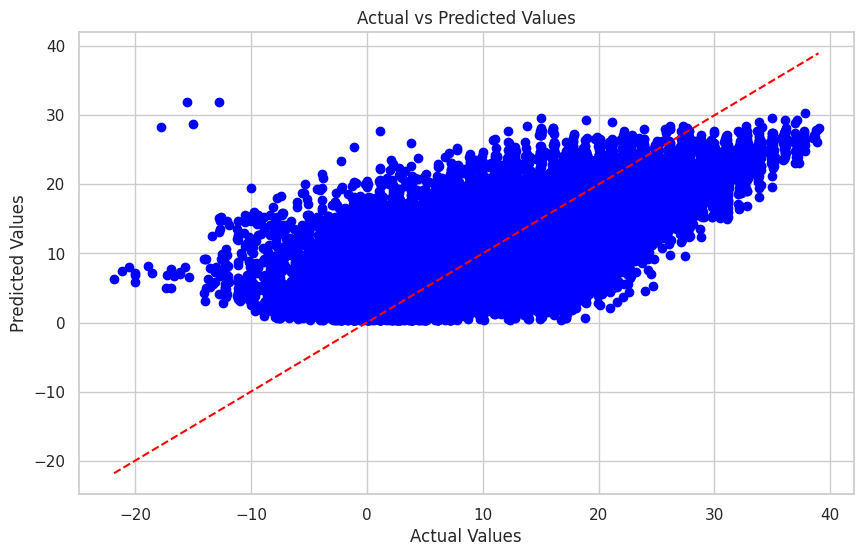

In [83]:
print("Mean Squared Error:", mse)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


Mean Squared Error: 70.05557759659901


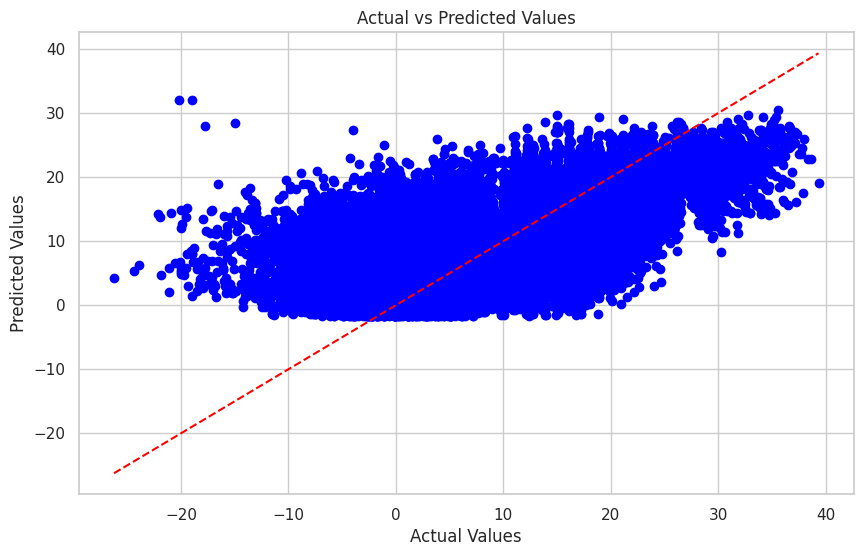

In [85]:
X = df[["Humidity","Visibility (km)"]]
y = df["Apparent Temperature (C)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=64)
scaler = StandardScaler()
train_normalized_data = scaler.fit_transform(X_train)
test_normalized_data = scaler.fit_transform(X_test)

model = LinearRegressionLS()
model.fit(train_normalized_data, y_train)

y_pred = model.predict(test_normalized_data)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

In [57]:
class RecursiveLeastSquares:
    def __init__(self, n_features, forgetting_factor=0.99):
        self.n_features = n_features
        self.forgetting_factor = forgetting_factor
        self.theta = np.zeros((n_features, 1))  # Initialize model parameters
        self.P = np.eye(n_features)  # Initialize covariance matrix

    def fit(self, X, y):
        errors = []
        for i in range(len(X)):
            x_i = X[i].reshape(-1, 1)
            y_i = y[i]

            # Predict
            y_pred = np.dot(x_i.T, self.theta)

            # Update
            error = y_i - y_pred
            errors.append(error)
            K = np.dot(self.P, x_i) / (self.forgetting_factor + np.dot(np.dot(x_i.T, self.P), x_i))
            self.theta = self.theta + np.dot(K, error)
            self.P = (1 / self.forgetting_factor) * (self.P - np.dot(K, np.dot(x_i.T, self.P)))

        return errors

    def predict(self, X):
        return np.dot(X, self.theta)




In [ ]:
X = df["Humidity"]
y = df["Temperature (C)"]
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=64)

# Initialize and fit the RLS model
rls = RecursiveLeastSquares(n_features=X_train.shape[1])
errors = rls.fit(X_train, y_train)

# Make predictions
y_pred = rls.predict(X_test)

# Calculate Mean Squared Error
mse = np.mean(np.array(errors)**2)
print("Mean Squared Error:", mse)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Boston Housing dataset)')
plt.grid(True)
plt.show()

In [ ]:
X = df[["Humidity","Visibility (km)"]]
y = df["Apparent Temperature (C)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=64)

# Initialize and fit the RLS model
rls = RecursiveLeastSquares(n_features=X_train.shape[1])
errors = rls.fit(X_train, y_train)

# Make predictions
y_pred = rls.predict(X_test)

# Calculate Mean Squared Error
mse = np.mean(np.array(errors)**2)
print("Mean Squared Error:", mse)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Boston Housing dataset)')
plt.grid(True)
plt.show()

Mean Squared Error (MSE) on the test set: 52.563
                            WLS Regression Results                            
Dep. Variable:        Temperature (C)   R-squared:                       0.429
Model:                            WLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                 2.715e+04
Date:                Sun, 07 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:55:25   Log-Likelihood:            -2.4550e+05
No. Observations:               72339   AIC:                         4.910e+05
Df Residuals:                   72336   BIC:                         4.910e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

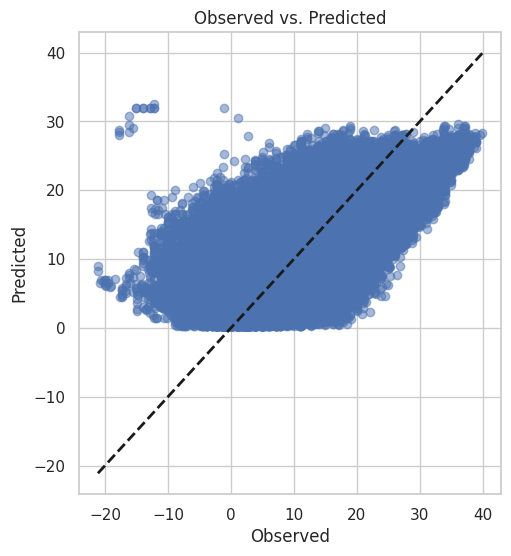

In [87]:
X = df[["Humidity", "Visibility (km)"]]
y = df["Temperature (C)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=64)

error_variance = 2

weights = 1 / error_variance

X_with_intercept = sm.add_constant(X_train)
model = sm.WLS(y_train, X_with_intercept, weights=weights)
result = model.fit()

X_test_with_intercept = sm.add_constant(X_test)
y_pred = result.predict(X_test_with_intercept)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) on the test set: {mse:.3f}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, result.predict(X_with_intercept), alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs. Predicted')

print(result.summary())

plt.show()

Mean Squared Error (MSE) on the test set: 70.051
                               WLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.392
Model:                                  WLS   Adj. R-squared:                  0.392
Method:                       Least Squares   F-statistic:                 2.330e+04
Date:                      Sun, 07 Apr 2024   Prob (F-statistic):               0.00
Time:                              21:06:35   Log-Likelihood:            -2.5597e+05
No. Observations:                     72339   AIC:                         5.119e+05
Df Residuals:                         72336   BIC:                         5.120e+05
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------

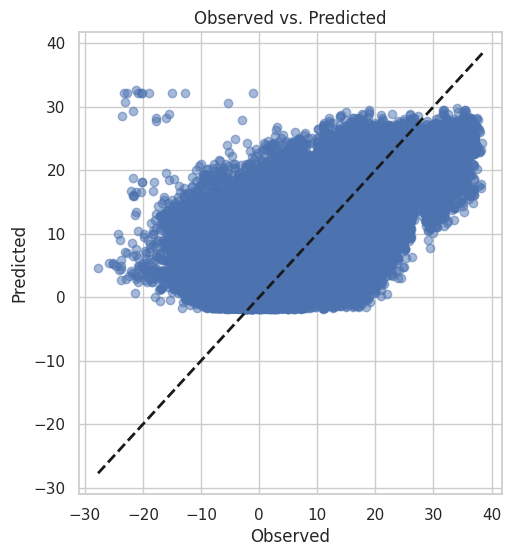

In [88]:
X = df[["Humidity","Visibility (km)"]]
y = df["Apparent Temperature (C)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=64)

error_variance = 2

weights = 1 / error_variance

X_with_intercept = sm.add_constant(X_train)
model = sm.WLS(y_train, X_with_intercept, weights=weights)
result = model.fit()

X_test_with_intercept = sm.add_constant(X_test)
y_pred = result.predict(X_test_with_intercept)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) on the test set: {mse:.3f}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, result.predict(X_with_intercept), alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs. Predicted')

print(result.summary())

plt.show()